# Práctica 2 Visión por Computador
## Autores:
- Héctor Wood Santana
- Alejandro Viera Ruiz 

Paquetes necesarios.

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

### Tarea 1: 
Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

#### Desglose:
- 1º: Buscar la fila con la mayor cantidad de pixeles blancos. Decir la cantidad y el índice de la fila.
- 2º: Numero de filas que poseen 0.95*max de pixeles blancos.

(0.0, 512.0)

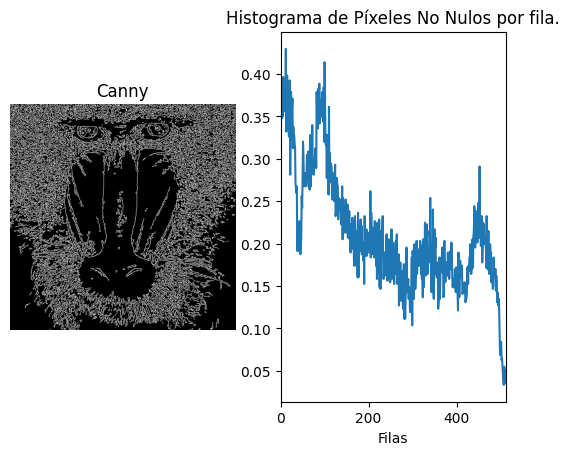

In [2]:
# Leemos la imagen
img = cv2.imread('./Material_P2/mandril.jpg')

#Comprobamos si hay lectura correcta y la convertimos a escala de grises
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else: 
    print('Imagen no encontrada')

# Obtenemos los contornos con Canny
canny_img = cv2.Canny(gray_img, 100, 200)

# Contamos el número de píxeles blancos por fila.
row_counts = cv2.reduce(canny_img, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalizamos el resultado para conocer la cantidad de pixeles blancos por fila.
rows = row_counts[:,0] / (255 * canny_img.shape[0])

# Mostramos los resultados
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Histograma de Píxeles No Nulos por fila.")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.xlim([0, canny_img.shape[0]])

In [3]:
row_counts_adjusted = row_counts[:, 0] / 255

row_max = np.max(row_counts_adjusted)
row_min =np.min(row_counts_adjusted)

print("Cantidad máxima de pixeles blancos en una fila: " ,row_max)
print("Cantidad minima de pixeles blancos en una fila: ", row_min)

index_row_max = np.argmax(row_counts_adjusted)
index_row_min = np.argmin(row_counts_adjusted)

print("Índice de la fila que contiene el máximo: " , index_row_max)
print("Índice de la fila que contiene el máximo: ", index_row_min)

rows_max_95 = row_counts_adjusted >= (0.95 * row_max)

print("Número de filas con 95% del máximo: ", np.sum(rows_max_95))


Cantidad máxima de pixeles blancos en una fila:  220.0
Cantidad minima de pixeles blancos en una fila:  17.0
Índice de la fila que contiene el máximo:  12
Índice de la fila que contiene el máximo:  507
Número de filas con 95% del máximo:  2


### Tarea 2: 
Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

#### Desglose:
- 1º: Generar una imagen de Sobel convertida a 8 bits.
- 2º: Unbralizar la imagen obtenida.
- 3º: Realizar un conteo por *filas* y por *columnas* como el realizado en la tarea anterior con la imagen umbralizada.
- 4º: Determinar las filas y columnas por encima del 95% del máximo.
- 5º: Remarcar en la imagen dichas filas y columnas.

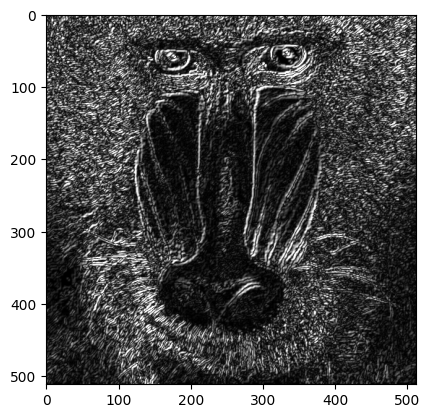

In [4]:
gray_s_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

sobelx = cv2.Sobel(gray_s_img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray_s_img, cv2.CV_64F, 0, 1)
sobel = cv2.add(sobelx, sobely)

sobel8_CV2 = cv2.convertScaleAbs(sobel)

plt.imshow(sobel8_CV2, cmap='gray')
plt.show()

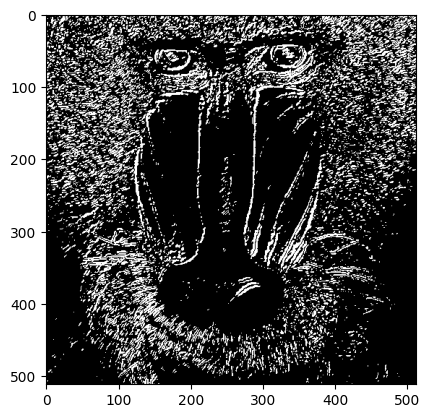

In [5]:
umbral_value = 100

res, umbral_img = cv2.threshold(sobel8_CV2, umbral_value, 255, cv2.THRESH_BINARY)

plt.imshow(umbral_img, cmap='gray')
plt.show()

(0.0, 512.0)

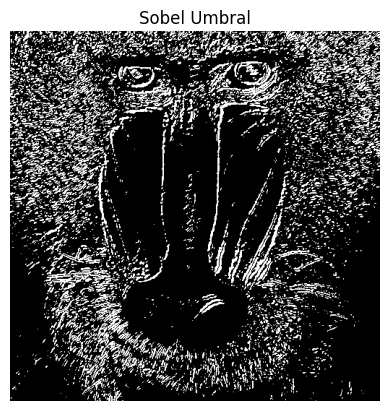

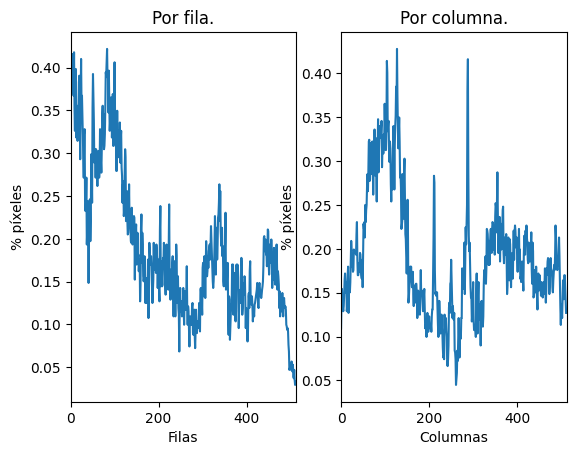

In [6]:
# Contamos el número de píxeles blancos por fila y por columna.
row_counts_sobel = cv2.reduce(umbral_img, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts_sobel = cv2.reduce(umbral_img, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalizamos el resultado para conocer la cantidad de pixeles blancos por fila y por columna.
rows_sobel = row_counts_sobel[:,0] / (255 * umbral_img.shape[0])
cols_sobel = col_counts_sobel[0] / (255 * umbral_img.shape[0])

# Mostramos los resultados
plt.axis("off")
plt.title("Sobel Umbral")
plt.imshow(umbral_img, cmap='gray')

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Por fila.")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_sobel)
plt.xlim([0, umbral_img.shape[0]])

plt.subplot(1, 2, 2)
plt.title("Por columna.")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_sobel)
plt.xlim([0, umbral_img.shape[1]])

In [7]:
row_sobel_counts_adjusted = row_counts_sobel[:, 0] / 255
col_sobel_counts_adjusted = col_counts_sobel[0] / 255

row_max_sobel = np.max(row_sobel_counts_adjusted)
row_min_sobel =np.min(row_sobel_counts_adjusted)

col_max_sobel = np.max(col_sobel_counts_adjusted)
col_min_sobel =np.min(col_sobel_counts_adjusted)

print("Cantidad máxima de pixeles blancos en una fila: " ,row_max_sobel)
print("Cantidad máxima de pixeles blancos en una columna: " ,col_max_sobel)

print("Cantidad minima de pixeles blancos en una fila: ", row_min_sobel)
print("Cantidad minima de pixeles blancos en una columna: ", col_min_sobel)


index_row_max_sobel = np.argmax(row_sobel_counts_adjusted)
index_row_min_sobel = np.argmin(row_sobel_counts_adjusted)

index_col_max_sobel = np.argmax(col_sobel_counts_adjusted)
index_col_min_sobel = np.argmin(col_sobel_counts_adjusted)

print("Índice de la fila que contiene el máximo: " , index_row_max_sobel)
print("Índice de la columna que contiene el máximo: " , index_col_max_sobel)

print("Índice de la fila que contiene el minimo: ", index_row_min_sobel)
print("Índice de la columna que contiene el minimo: ", index_col_min_sobel)


rows_sobel_max_95 = row_sobel_counts_adjusted > (0.95 * row_max_sobel)
cols_sobel_max_95 = col_sobel_counts_adjusted > (0.95 * col_max_sobel)

print("Número de filas con 95% del máximo: ", np.sum(rows_sobel_max_95))
print("Número de columnas con 95% del máximo: ", np.sum(cols_sobel_max_95))

Cantidad máxima de pixeles blancos en una fila:  216.0
Cantidad máxima de pixeles blancos en una columna:  219.0
Cantidad minima de pixeles blancos en una fila:  15.0
Cantidad minima de pixeles blancos en una columna:  23.0
Índice de la fila que contiene el máximo:  83
Índice de la columna que contiene el máximo:  127
Índice de la fila que contiene el minimo:  510
Índice de la columna que contiene el minimo:  261
Número de filas con 95% del máximo:  7
Número de columnas con 95% del máximo:  3


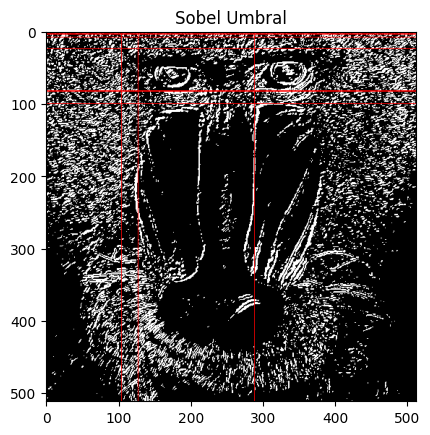

In [8]:
umbral_img_rgb = cv2.cvtColor(umbral_img, cv2.COLOR_GRAY2RGB)

for i in range(0, umbral_img.shape[1]):
    if cols_sobel_max_95[i] == True:
        cv2.line(umbral_img_rgb, (i, 0), (i, umbral_img.shape[0]), (255, 0, 0), 1)

for j in range(0, umbral_img.shape[0]):
    if rows_sobel_max_95[j] == True:
        cv2.line(umbral_img_rgb, (0, j), (umbral_img.shape[1], j), (255, 0, 0), 1)

plt.title("Sobel Umbral")
plt.imshow(umbral_img_rgb) 
plt.show()

### Tarea 3:

Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [9]:
def apply_filter(frame, filter_type):
    if filter_type == 1:
        r,g,b = cv2.split(frame)

        h, w, c = frame.shape

        frame1 = cv2.merge(((r).astype(np.uint8), (g*120).astype(np.uint8), (b*75).astype(np.uint8)))
        frame2 = cv2.merge(((r).astype(np.uint8), (g*255).astype(np.uint8), (b*0).astype(np.uint8)))
        frame3 = cv2.merge(((r).astype(np.uint8), (g*255).astype(np.uint8), (b).astype(np.uint8)))
        frame4 = cv2.merge(((r*255).astype(np.uint8), (g).astype(np.uint8), (b*255).astype(np.uint8)))

        collage_p1 = np.hstack((frame1, frame2))
        collage_p2 = np.hstack((frame3, frame4))
        collage = np.vstack((collage_p1, collage_p2))

        return cv2.resize(collage, (int(w*1.5), int(h*1.5)), cv2.INTER_NEAREST)
    
    elif filter_type == 2:
        gray_vid = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_s_vid = cv2.GaussianBlur(gray_vid, (3, 3), 0)
        
        sobelx = cv2.Sobel(gray_s_vid, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(gray_s_vid, cv2.CV_64F, 0, 1)
        sobel = cv2.add(sobelx, sobely)
        vid_sobel8 = cv2.convertScaleAbs(sobel)
        
        umbral_value = 100
        res, umbral_vid = cv2.threshold(vid_sobel8, umbral_value, 255, cv2.THRESH_BINARY)

        row_counts_vid = cv2.reduce(umbral_vid, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
        col_counts_vid = cv2.reduce(umbral_vid, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
            
        row_vid_counts_adjusted = row_counts_vid[:, 0] / 255
        col_vid_counts_adjusted = col_counts_vid[0] / 255

        index_row_max_vid = np.argmax(row_vid_counts_adjusted)
        index_row_min_vid = np.argmin(row_vid_counts_adjusted)

        index_col_max_vid = np.argmax(col_vid_counts_adjusted)
        index_col_min_vid = np.argmin(col_vid_counts_adjusted)

        umbral_vid_rgb = cv2.cvtColor(umbral_vid, cv2.COLOR_GRAY2RGB)

        cv2.line(umbral_vid_rgb, (index_col_max_vid, 0), (index_col_max_vid, umbral_vid.shape[0]), (255, 0, 0), 1)
        cv2.line(umbral_vid_rgb, (0, index_row_max_vid), (umbral_vid.shape[1], index_row_max_vid), (255, 0, 0), 1)

        cv2.line(umbral_vid_rgb, (index_col_min_vid, 0), (index_col_min_vid, umbral_vid.shape[0]), (0, 0, 255), 1)
        cv2.line(umbral_vid_rgb, (0, index_row_min_vid), (umbral_vid.shape[1], index_row_min_vid), (0, 0, 255), 1)

        return umbral_vid_rgb
    elif filter_type == 3:
        return cv2.bitwise_not(frame)
    elif filter_type == 4:
        zona = eliminador_fondo.apply(frame)
        fondo = eliminador_fondo.getBackgroundImage()
        return fondo
    else:
        return frame


vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

eliminador_fondo = cv2.createBackgroundSubtractorMOG2(history=10, varThreshold=50, detectShadows=True)

filter_type = 0
print("Menú de filtros:")
print("0. Sin filtro")
print("1. Pop Art")
print("2. Filas & Columnas con más y menos pixeles blancos")
print("3. Inversión de Color")
print("4. Efecto Matrix")

while True:
    ret, frame = vid.read()
    
    if ret:

        frame_flip = cv2.flip(frame,1)
        filter_frame = apply_filter(frame, filter_type)
        
        cv2.imshow('Webcam', filter_frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break
    elif key == ord('0'):
        filter_type = 0
        print("Sin Filtro")
    elif key == ord('1'):
        filter_type = 1
        print("Pop Art")
    elif key == ord('2'):
        filter_type = 2
        print("Filas & Columnas con más y menos pixeles blancos")
    elif key == ord('3'):
        filter_type = 3
        print("Inversión de Color")
    elif key == ord('4'):
        filter_type = 4
        print("Efecto Matrix")

vid.release()
cv2.destroyAllWindows()

Menú de filtros:
0. Sin filtro
1. Pop Art
2. Filas & Columnas con más y menos pixeles blancos
3. Inversión de Color
4. Efecto Matrix


### Tarea 4:

Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.   

In [10]:
def detect_red_and_draw_rectangle(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red_1 = np.array([0, 120, 70])
    upper_red_1 = np.array([10, 255, 255])

    lower_red_2 = np.array([170, 120, 70])
    upper_red_2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(hsv, lower_red_2, upper_red_2)

    mask = mask1 + mask2

    red_detected = cv2.bitwise_and(frame, frame, mask=mask)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        x, y, w, h = cv2.boundingRect(largest_contour)
        
        if w > h:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        else:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        
    return frame


vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = vid.read()
    
    if ret:

        frame_flip = cv2.flip(frame,1)
        
        cv2.imshow('Webcam', detect_red_and_draw_rectangle(frame_flip))
    
    if cv2.waitKey(20) ==27:
        break

vid.release()
cv2.destroyAllWindows()